***Importing all the Necessary libraries***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import numpy as np

***Definning the dataset path***
* *os.walk() function: to traverse a directory tree starting from the path "../input/fruit-recognition".*
* *The current directory path is stored in the variable dirpath, the list of subdirectory names is stored in the variable dirnames, and the list of filenames is stored in the variable filenames.*

In [2]:
os.getcwd()

'C:\\Users\\Apurva\\Documents\\python'

In [3]:
for dirpath, dirnames, filenames in os.walk("C:\\Users\\Apurva\\Documents\\python\\Fruit recognition"):
    print(r"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.
There are {len(d

***Setting path for TRAIN AND TEST***

In [4]:
train_path = "C:\\Users\\Apurva\\Documents\\python\\Fruit recognition\\train\\train"
test_path = "C:\\Users\Apurva\\Documents\\python\\Fruit recognition\\test\\"

***Getting the Different class names from the directory***

In [5]:
data_dir = pathlib.Path(train_path) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(len(class_names))

33


***Plot a grid of images from a training dataset***

In [6]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

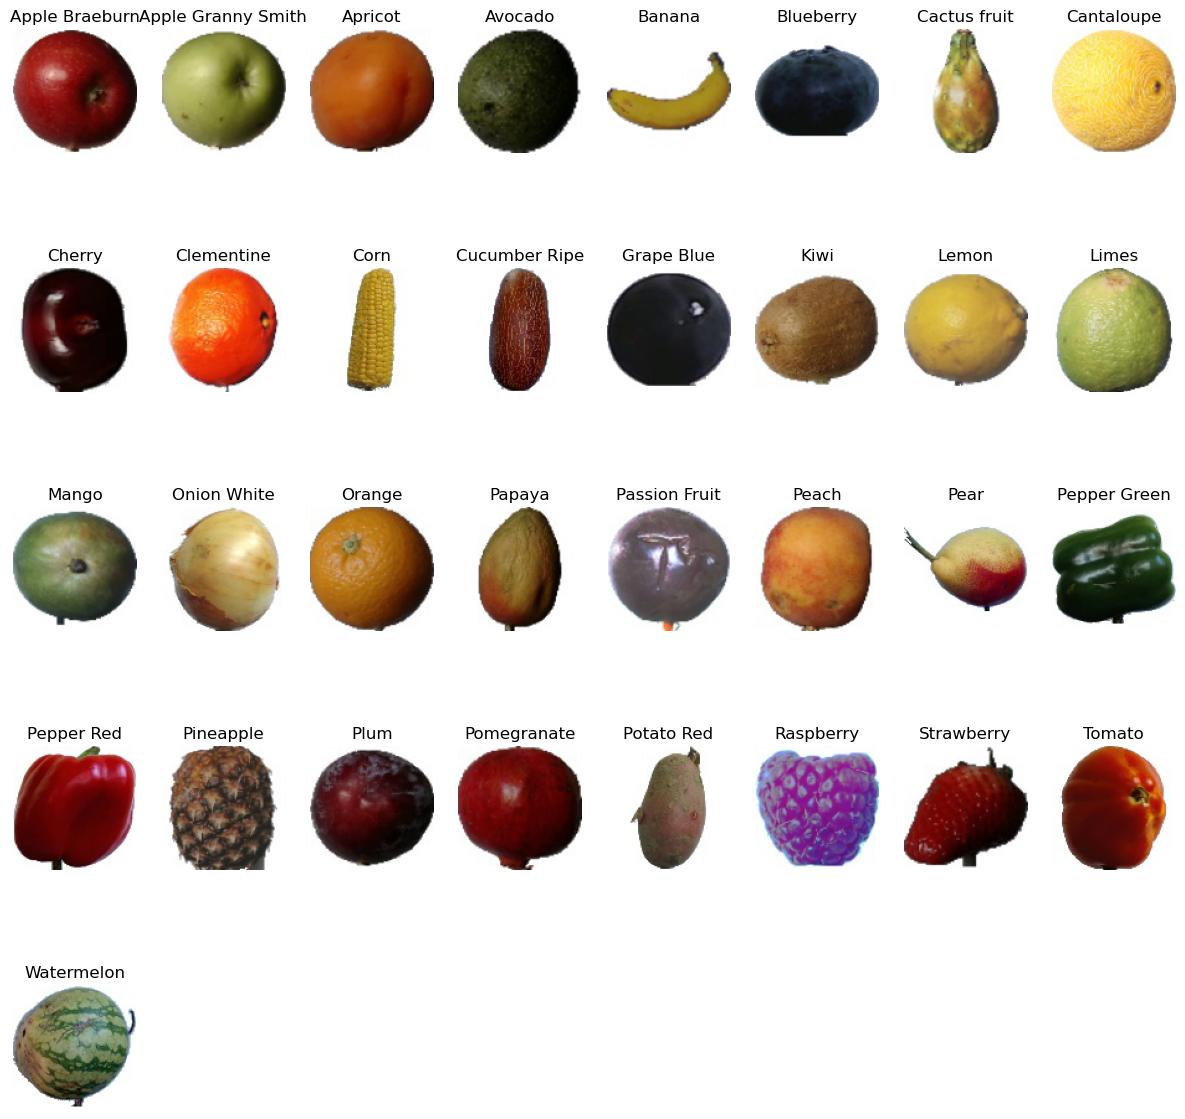

In [7]:
plt.figure(figsize = (15,15))
# View a random image from the training dataset for all classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,target_class=class_names[i])

***Preparing VALIDATION Data***

*Collects Information about the training dataset by traversing the directory tree using os.walk() and populating a dictionary called train_val_data.*

In [8]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [9]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,C:\Users\Apurva\Documents\python\Fruit recogni...,Apple Braeburn_0.jpg,Apple Braeburn
1,C:\Users\Apurva\Documents\python\Fruit recogni...,Apple Braeburn_1.jpg,Apple Braeburn
2,C:\Users\Apurva\Documents\python\Fruit recogni...,Apple Braeburn_10.jpg,Apple Braeburn
3,C:\Users\Apurva\Documents\python\Fruit recogni...,Apple Braeburn_100.jpg,Apple Braeburn
4,C:\Users\Apurva\Documents\python\Fruit recogni...,Apple Braeburn_101.jpg,Apple Braeburn


***Prepare the Testing Data***

In [10]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [11]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,C:\Users\Apurva\Documents\python\Fruit recogni...,0000.jpg
1,C:\Users\Apurva\Documents\python\Fruit recogni...,0001.jpg
2,C:\Users\Apurva\Documents\python\Fruit recogni...,0002.jpg
3,C:\Users\Apurva\Documents\python\Fruit recogni...,0003.jpg
4,C:\Users\Apurva\Documents\python\Fruit recogni...,0004.jpg


***Read Images and create numpy data array***

In [12]:

images = []
label = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [13]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [14]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))
    
test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


***Label Encoding***

In [15]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')


***Train And Validation split***

In [16]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)

In [17]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [18]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [19]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape


### create an iterator and turn it into numpy array 
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [20]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [21]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (33,)


In [22]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[251., 255., 252.],
        [254., 254., 254.],
        [255., 254., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

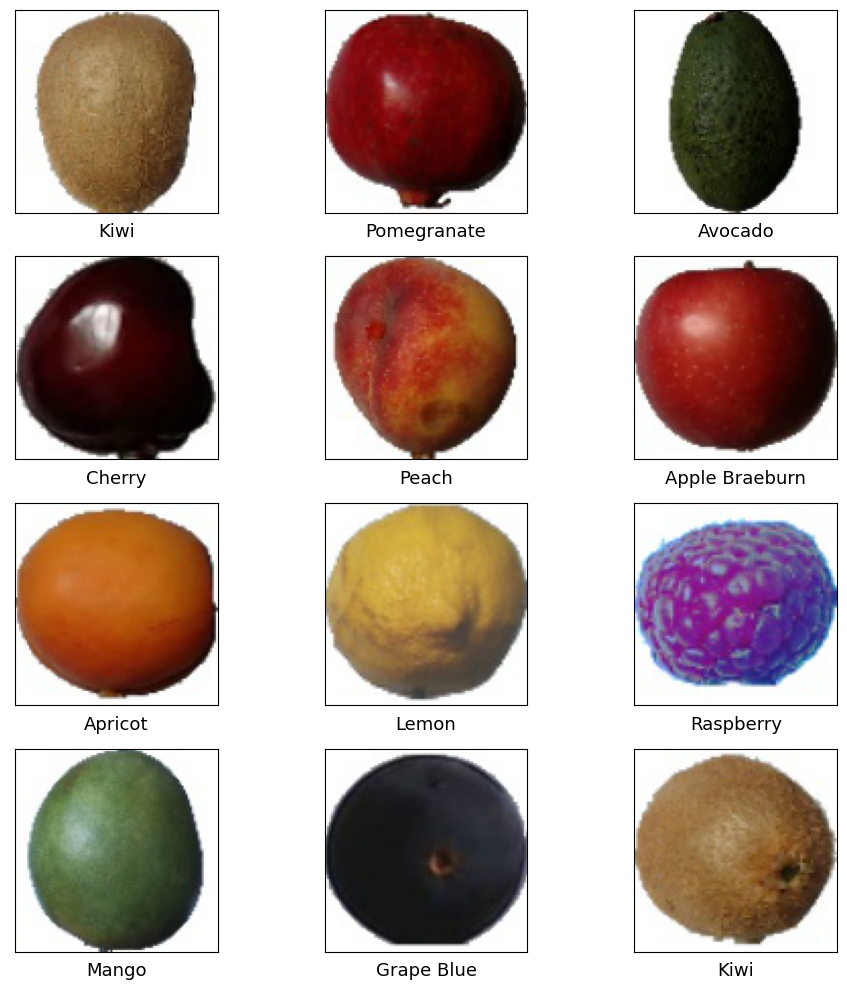

In [23]:

fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()    
plt.show()

***Data Pipeline using`tf.data` & Prefetching***

In [24]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

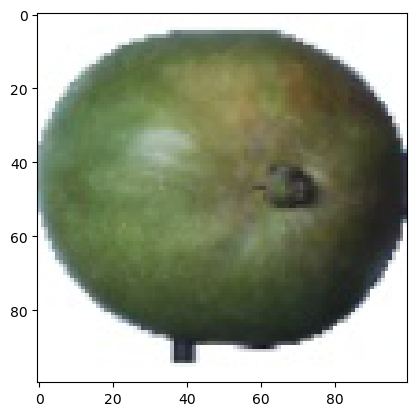

In [25]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [26]:
BATCH_SIZE = 128 
AUTOTUNE = tf.data.AUTOTUNE 

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)
    
    #batch the data 
    ds = ds.batch(BATCH_SIZE)
    
    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [27]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

***CNN Model***
* *The model consists of a convolutional layer, a max pooling layer, a flatten layer, and a dense (fully connected) layer with a softmax activation function*

In [28]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [29]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 5)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 33)                396198    
                                                                 
Total params: 396338 (1.51 MB)
Trainable params: 396338 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Fitting The Model***

In [30]:
#Fit the model on training data 
history_1 = model_1.fit(train_ds,
                       epochs =25,
                       validation_data= val_ds)

Epoch 1/25
106/106 [==============================] - 13s 110ms/step - loss: 1.0008 - accuracy: 0.7693 - val_loss: 0.1573 - val_accuracy: 0.9792
Epoch 2/25
106/106 [==============================] - 11s 101ms/step - loss: 0.0740 - accuracy: 0.9916 - val_loss: 0.0374 - val_accuracy: 0.9958
Epoch 3/25
106/106 [==============================] - 11s 103ms/step - loss: 0.0236 - accuracy: 0.9987 - val_loss: 0.0234 - val_accuracy: 0.9973
Epoch 4/25
106/106 [==============================] - 11s 102ms/step - loss: 0.0106 - accuracy: 0.9997 - val_loss: 0.0111 - val_accuracy: 0.9988
Epoch 5/25
106/106 [==============================] - 11s 102ms/step - loss: 0.0070 - accuracy: 0.9997 - val_loss: 0.0076 - val_accuracy: 0.9988
Epoch 6/25
106/106 [==============================] - 11s 103ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/25
106/106 [==============================] - 11s 103ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0035 - val_ac

***Plotting Graph for loss & accuracy***

<AxesSubplot:>

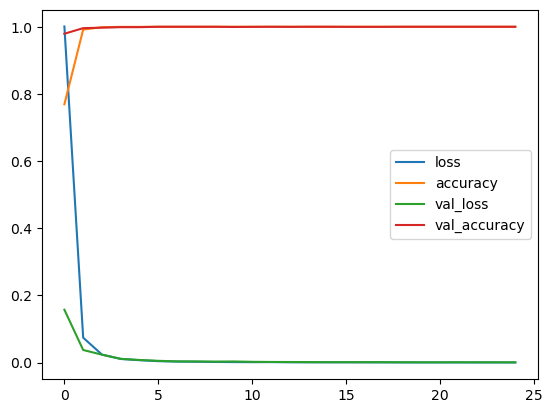

In [31]:
#loss and accuracy plot 
pd.DataFrame(history_1.history).plot()

***Saving The Model***

In [32]:
model_1.save('model.h5')

C:\Users\Apurva\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
loaded_model = tf.keras.models.load_model(r"C:\Users\Apurva\Documents\python\model.h5")

In [36]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed